# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
from api_keys import api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + "&q=" + city
        #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
    pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | gimli
Processing Record 2 | batagay-alyta
Processing Record 3 | tapaua
City tapaua not found. Skipping to next city.
Processing Record 4 | rikitea
Processing Record 5 | kamakwie
Processing Record 6 | esperance
Processing Record 7 | jamestown
Processing Record 8 | sao joao da barra
Processing Record 9 | grindavik
Processing Record 10 | butaritari
Processing Record 11 | bambous virieux
Processing Record 12 | erzin
Processing Record 13 | bluff
Processing Record 14 | mahebourg
Processing Record 15 | camacupa
Processing Record 16 | yenagoa
Processing Record 17 | norman wells
Processing Record 18 | fortuna
Processing Record 19 | mataura
Processing Record 20 | kodiak
Processing Record 21 | vaitupu
City vaitupu not found. Skipping to next city.
Processing Record 22 | albany
Processing Record 23 | chokurdakh
Processing Record 24 | airai
Processing Record 25 | taolanaro
City taolanaro not found. Skipping to next ci

Processing Record 215 | fethiye
Processing Record 216 | iqaluit
Processing Record 217 | hambantota
Processing Record 218 | san angelo
Processing Record 219 | tuatapere
Processing Record 220 | puerto madryn
Processing Record 221 | victoria
Processing Record 222 | narsaq
Processing Record 223 | mabaruma
Processing Record 224 | chipinge
Processing Record 225 | kipushi
Processing Record 226 | conway
Processing Record 227 | spisska bela
Processing Record 228 | wageningen
Processing Record 229 | cap malheureux
Processing Record 230 | isangel
Processing Record 231 | opuwo
Processing Record 232 | sao filipe
Processing Record 233 | brae
Processing Record 234 | nome
Processing Record 235 | beloha
Processing Record 236 | rudsar
Processing Record 237 | nyrob
Processing Record 238 | belushya guba
City belushya guba not found. Skipping to next city.
Processing Record 239 | teguldet
Processing Record 240 | guthrie
Processing Record 241 | fairbanks
Processing Record 242 | ilulissat
Processing Record 2

Processing Record 434 | vao
Processing Record 435 | miajadas
Processing Record 436 | utiroa
City utiroa not found. Skipping to next city.
Processing Record 437 | atar
Processing Record 438 | priiskovyy
Processing Record 439 | krasnoselkup
City krasnoselkup not found. Skipping to next city.
Processing Record 440 | frederico westphalen
Processing Record 441 | lata
Processing Record 442 | tsabong
Processing Record 443 | iwanai
Processing Record 444 | kieta
Processing Record 445 | kommunar
Processing Record 446 | belogorsk
Processing Record 447 | chagda
City chagda not found. Skipping to next city.
Processing Record 448 | calvinia
Processing Record 449 | gadung
Processing Record 450 | sobolevo
Processing Record 451 | leningradskiy
Processing Record 452 | hokitika
Processing Record 453 | rosarito
Processing Record 454 | atherton
Processing Record 455 | matamoros
Processing Record 456 | balabac
Processing Record 457 | xuddur
Processing Record 458 | abashiri
Processing Record 459 | helong
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:

# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Max Temp      556
Wind Speed    556
lng           556
dtype: int64

In [12]:

city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,gimli,0,CA,1548900293,0,50.63,-43.24,3.74,-96.99
1,batagay-alyta,0,RU,1548900367,0,67.80,-48.78,3.06,130.41
2,rikitea,44,PF,1548900368,100,-23.12,81.14,8.99,-134.97
3,kamakwie,0,SL,1548900368,91,9.50,69.89,2.84,-12.24
4,esperance,20,TT,1548896400,83,10.24,75.20,5.82,-61.45


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

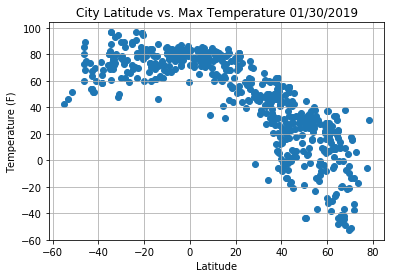

In [13]:

date = time.strftime("%m/%d/%Y")

plt.scatter(lats, max_temps)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")

# Save the figure
plt.savefig("output_data-Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

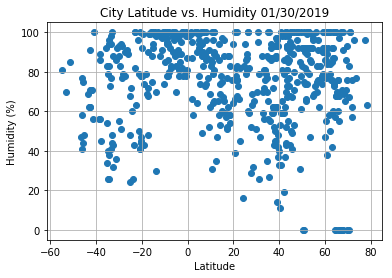

In [14]:

date = time.strftime("%m/%d/%Y")

plt.scatter(lats, humidity)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

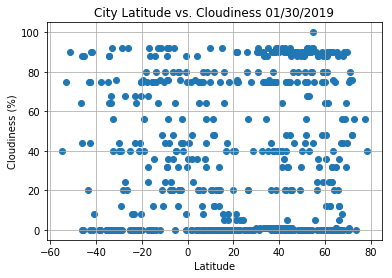

In [15]:

date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

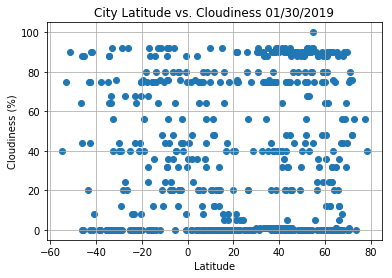

In [16]:

date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data-Fig3.png")

# Show plot
plt.show()